# Evaluation mode

In [119]:
# train_then_eval_model(model=model,optimizer=optimizer,train_loader=train_loader,valid_loader=test_loader,criterion=criterion)

In [1]:
import requests
import os

In [21]:
# URL publique pour télécharger les poids
public_url = 'https://papereplbucket.s3.eu-west-3.amazonaws.com/torchsimclr/checkpoint_0100.pth.tar'
# URL publique pour télécharger les poids
local_model_weights_path = './artefacts/simclr_resnet18_pretrained.pth.tar'

# Créer le répertoire si nécessaire
os.makedirs(os.path.dirname(local_model_weights_path), exist_ok=True)

# Télécharger le fichier des poids
response = requests.get(public_url)
with open(local_model_weights_path, 'wb') as f:
    f.write(response.content)

In [6]:
from sklearn.model_selection import train_test_split
from collections import Counter

from torchvision import datasets
import torchvision.transforms as transforms

In [7]:
mnist_train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

mnist_test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
print(len(mnist_train_dataset))
print(mnist_train_dataset.targets.numpy())
# sample100 = Subset(dataset=mnist_train_dataset,indices=)
Counter(mnist_train_dataset.targets.numpy())

60000
[5 0 4 ... 5 6 8]


Counter({np.int64(1): 6742,
         np.int64(7): 6265,
         np.int64(3): 6131,
         np.int64(2): 5958,
         np.int64(9): 5949,
         np.int64(0): 5923,
         np.int64(6): 5918,
         np.int64(8): 5851,
         np.int64(4): 5842,
         np.int64(5): 5421})

## Split dataset

In [10]:
import numpy as np
from torch.utils.data import DataLoader, Subset

In [15]:
# sample 100 data with same classes proportion 
train_idx, validation_idx = train_test_split(np.arange(len(mnist_train_dataset)),
                                             train_size=100,
                                             random_state=1,
                                             shuffle=True,
                                             stratify=mnist_train_dataset.targets.numpy())

In [16]:
Counter(mnist_train_dataset.targets.numpy()[train_idx])

Counter({np.int64(1): 11,
         np.int64(0): 10,
         np.int64(3): 10,
         np.int64(6): 10,
         np.int64(2): 10,
         np.int64(7): 10,
         np.int64(8): 10,
         np.int64(9): 10,
         np.int64(4): 10,
         np.int64(5): 9})

In [39]:
mnist_train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [17]:
# Subset dataset for train and val
train_dataset = Subset(mnist_train_dataset, train_idx)


train_loader = DataLoader(train_dataset, 
                          batch_size=10,
                          num_workers=8, 
                          drop_last=False, 
                          shuffle=True)

test_loader = DataLoader(mnist_test_dataset, 
                         batch_size=256,
                         num_workers=8, 
                         drop_last=False, 
                         shuffle=True)

# Counter(train_dataset.targets.numpy())
# train_loader.batch_size

## Get pretrained model weights

In [25]:
import requests
import os
import torch

# URL publique pour télécharger les poids
public_url = 'https://papereplbucket.s3.eu-west-3.amazonaws.com/simclr/checkpoint_0100.pth.tar'
local_model_weights_path = './artefacts/simclr_pretrained.pth'

# Créer le répertoire si nécessaire
os.makedirs(os.path.dirname(local_model_weights_path), exist_ok=True)

# Télécharger le fichier des poids
response = requests.get(public_url)

# Vérifier si le téléchargement a réussi
if response.status_code == 200:
    with open(local_model_weights_path, 'wb') as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# Charger les poids dans le modèle si le téléchargement a réussi
if os.path.exists(local_model_weights_path):
    try:
        checkpoint = torch.load(local_model_weights_path, map_location=device)  # Remplacez 'cpu' par 'device' si nécessaire
        print("Model weights loaded successfully.")
    except Exception as e:
        print(f"Error loading model weights: {e}")
else:
    print("Model weights file does not exist.")

File downloaded successfully.
Model weights loaded successfully.


/tmp/ipykernel_22334/2568960631.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(local_model_weights_path, map_location='cpu')  # Remplacez 'cpu'

In [29]:
checkpoint.keys()

dict_keys(['epoch', 'arch', 'state_dict', 'optimizer'])

In [30]:
state_dict = checkpoint['state_dict']
state_dict

OrderedDict([('backbone.conv1.weight',
              tensor([[[[ 0.0007, -0.1061,  0.0154,  ..., -0.1280,  0.0474, -0.0358],
                        [ 0.0323,  0.0011,  0.0904,  ...,  0.0654, -0.1259, -0.1415],
                        [ 0.0288,  0.0331, -0.0007,  ...,  0.0209,  0.1195, -0.0998],
                        ...,
                        [-0.0327,  0.0603, -0.1751,  ..., -0.0010, -0.0506, -0.0756],
                        [ 0.0956,  0.0559,  0.1436,  ..., -0.0661,  0.1330,  0.1642],
                        [-0.0696, -0.1836,  0.0257,  ...,  0.0094, -0.0058,  0.0263]]],
              
              
                      [[[-0.0116, -0.0732, -0.0667,  ..., -0.1068,  0.0697, -0.0507],
                        [-0.0029, -0.1050,  0.0703,  ..., -0.1288, -0.1176, -0.0512],
                        [ 0.0538,  0.0254, -0.0193,  ...,  0.0728,  0.1117,  0.1083],
                        ...,
                        [ 0.0321, -0.1053,  0.0395,  ...,  0.0379, -0.0962, -0.0496],
           

In [31]:
state_dict.keys()

odict_keys(['backbone.conv1.weight', 'backbone.bn1.weight', 'backbone.bn1.bias', 'backbone.bn1.running_mean', 'backbone.bn1.running_var', 'backbone.bn1.num_batches_tracked', 'backbone.layer1.0.conv1.weight', 'backbone.layer1.0.bn1.weight', 'backbone.layer1.0.bn1.bias', 'backbone.layer1.0.bn1.running_mean', 'backbone.layer1.0.bn1.running_var', 'backbone.layer1.0.bn1.num_batches_tracked', 'backbone.layer1.0.conv2.weight', 'backbone.layer1.0.bn2.weight', 'backbone.layer1.0.bn2.bias', 'backbone.layer1.0.bn2.running_mean', 'backbone.layer1.0.bn2.running_var', 'backbone.layer1.0.bn2.num_batches_tracked', 'backbone.layer1.1.conv1.weight', 'backbone.layer1.1.bn1.weight', 'backbone.layer1.1.bn1.bias', 'backbone.layer1.1.bn1.running_mean', 'backbone.layer1.1.bn1.running_var', 'backbone.layer1.1.bn1.num_batches_tracked', 'backbone.layer1.1.conv2.weight', 'backbone.layer1.1.bn2.weight', 'backbone.layer1.1.bn2.bias', 'backbone.layer1.1.bn2.running_mean', 'backbone.layer1.1.bn2.running_var', 'backbo

In [32]:
# remove all keys that starts with 'backbone.'
for k in list(state_dict.keys()):

    if k.startswith('backbone.'):
        if k.startswith('backbone') and not k.startswith('backbone.fc'):
            # remove prefix
            state_dict[k[len("backbone."):]] = state_dict[k]
    del state_dict[k]

In [33]:
state_dict.keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean', 'layer2.0.downsample.1.running_var', 'layer2.0.downsample.1.num_batches_tracked', 'layer2.0.conv1.we

In [ ]:
def load_model(model_path, device):
    # URL publique pour télécharger les poids

    local_model_weights_path = './artefacts/simclr_pretrained.pth'

    # Créer le répertoire si nécessaire
    os.makedirs(os.path.dirname(local_model_weights_path), exist_ok=True)

    # Télécharger le fichier des poids
    response = requests.get(public_url)

    # Vérifier si le téléchargement a réussi
    if response.status_code == 200:
        with open(local_model_weights_path, 'wb') as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

    # Charger les poids dans le modèle si le téléchargement a réussi
    if os.path.exists(local_model_weights_path):
        try:
            checkpoint = torch.load(local_model_weights_path, map_location=device)  # Remplacez 'cpu' par 'device' si nécessaire
            print("Model weights loaded successfully.")
        except Exception as e:
            print(f"Error loading model weights: {e}")
    else:
        print("Model weights file does not exist.")
        
    state_dict = checkpoint['state_dict']

    for k in list(state_dict.keys()):
        if k.startswith('backbone.'):
            if k.startswith('backbone') and not k.startswith('backbone.fc'):
                # remove prefix
                state_dict[k[len("backbone."):]] = state_dict[k]
        del state_dict[k]
    
    return state_dict

## Load weights

In [52]:
# Automatically reload modules when they change
%load_ext autoreload
%autoreload 2

# Add the directory containing resnet.py to the Python path
import sys
from pathlib import Path

# Assuming resnet.py is in the 'simclr/models' directory relative to the notebook
module_path = Path('..') / 'simclr'
sys.path.append(str(module_path.resolve()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
# Import the classes
from models.resnet import ResNet18, BasicBlock

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

In [54]:
model = ResNet18(num_layers=18,
                  block=BasicBlock,
                  num_classes=10,
                  grayscale=True)
model.to(device=device)

ResNet18(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)


In [55]:
# key 1 <-> key 1
# Key 2 <-> key 2
# ignore <-> key 3 
log = model.load_state_dict(state_dict, strict=False)
assert log.missing_keys == ['fc.weight', 'fc.bias']

In [56]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.0008)
criterion = torch.nn.CrossEntropyLoss().to(device)

In [57]:
def accuracy(output, target, topk=(1,)):
    """Computes the accuracy over the k top predictions for the specified values of k"""
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        # indices, values
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [64]:
epochs = 30
for epoch in range(epochs):
    top1_train_accuracy = 0
    for counter, (x_batch, y_batch) in enumerate(train_loader):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        logits = model(x_batch)
        #print(logits.shape)
        #print(y_batch.shape)
        loss = criterion(logits, y_batch)
        top1 = accuracy(logits, y_batch, topk=(1,))
        top1_train_accuracy += top1[0]

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    top1_train_accuracy /= (counter + 1)
    top1_accuracy = 0
    top5_accuracy = 0
    for counter, (x_batch, y_batch) in enumerate(test_loader):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        logits = model(x_batch)

        top1, top5 = accuracy(logits, y_batch, topk=(1,5))
        top1_accuracy += top1[0]
        top5_accuracy += top5[0]

    top1_accuracy /= (counter + 1)
    top5_accuracy /= (counter + 1)
    print(f"Epoch {epoch}\t"
          f"Top1 Train accuracy {top1_train_accuracy.item()}\t"
          f"Top1 Test accuracy: {top1_accuracy.item()}\t"
          f"Top5 test accuracy: {top5_accuracy.item()}")

Epoch 0	Top1 Train accuracy 33.0	Top1 Test accuracy: 73.603515625	Top5 test accuracy: 95.966796875
Epoch 1	Top1 Train accuracy 92.0	Top1 Test accuracy: 88.3984375	Top5 test accuracy: 99.39453125
Epoch 2	Top1 Train accuracy 97.0	Top1 Test accuracy: 91.083984375	Top5 test accuracy: 99.541015625
Epoch 3	Top1 Train accuracy 100.0	Top1 Test accuracy: 91.93359375	Top5 test accuracy: 99.365234375
Epoch 4	Top1 Train accuracy 99.0	Top1 Test accuracy: 92.98828125	Top5 test accuracy: 99.58984375
Epoch 5	Top1 Train accuracy 99.0	Top1 Test accuracy: 92.20703125	Top5 test accuracy: 99.638671875
Epoch 6	Top1 Train accuracy 99.0	Top1 Test accuracy: 91.77734375	Top5 test accuracy: 99.658203125
Epoch 7	Top1 Train accuracy 100.0	Top1 Test accuracy: 91.357421875	Top5 test accuracy: 99.453125
Epoch 8	Top1 Train accuracy 100.0	Top1 Test accuracy: 92.197265625	Top5 test accuracy: 99.638671875
Epoch 9	Top1 Train accuracy 100.0	Top1 Test accuracy: 92.67578125	Top5 test accuracy: 99.62890625
Epoch 10	Top1 Train

In [65]:
import matplotlib.pyplot as plt

from utils.plotting import plot_confusion_matrix
from utils.evaluate import compute_confusion_matrix


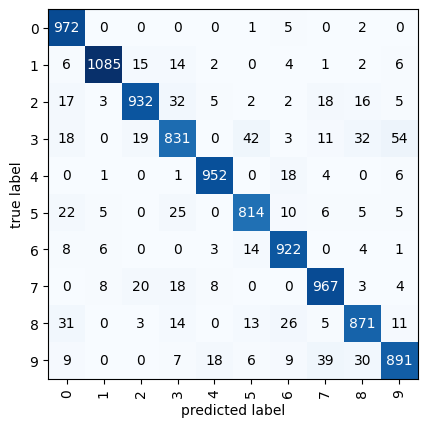

In [66]:
class_dict = {0: '0',
              1: '1',
              2: '2',
              3: '3',
              4: '4',
              5: '5',
              6: '6',
              7: '7',
              8: '8',
              9: '9'}

mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values(), results_dir='./figures')
plt.show()

In [67]:
torch.save(model.state_dict(), './artefacts/simclr_finetuned.pth')